Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df_train = pd.read_csv(r'C:\Users\alibe\Downloads\PFE\Data\train (1).csv')
df_test = pd.read_csv(r'C:\Users\alibe\Downloads\PFE\Data\test.csv')
df_val = pd.read_csv(r'C:\Users\alibe\Downloads\PFE\Data\val.csv')

In [3]:
df_train

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral


In [4]:
df_train['party'].value_counts()


party
Democratic Party     100
Republican Party     100
Green Party          100
Independent          100
Libertarian Party    100
Name: count, dtype: int64

In [5]:
df_train_Party = df_train['party']
df_Val_Party = df_val['party']
df_test_Party = df_test['party']

Processing pour les candidats

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_train['tweet_text'])

train_sequences = tokenizer.texts_to_sequences(df_train['tweet_text'])
valid_sequences = tokenizer.texts_to_sequences(df_val['tweet_text'])
test_sequences = tokenizer.texts_to_sequences(df_test['tweet_text'])

max_seq_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_seq_length, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_seq_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_seq_length, padding='post')

all_labels = pd.concat([df_train['party'], df_val['party'], df_test['party']])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

train_labels = label_encoder.transform(df_train['party'])
valid_labels = label_encoder.transform(df_val['party'])
test_labels = label_encoder.transform(df_test['party'])

onehot_encoder = OneHotEncoder(sparse_output=False)

train_labels = train_labels.reshape(-1, 1)
valid_labels = valid_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

train_onehot_labels = onehot_encoder.fit_transform(train_labels)
valid_onehot_labels = onehot_encoder.transform(valid_labels)
test_onehot_labels = onehot_encoder.transform(test_labels)

In [7]:
vocab_size = 10000
train_input = np.array(train_padded)
val_input = np.array(valid_padded)
test_input = np.array(test_padded)

train_label = np.array(train_onehot_labels)
val_label = np.array(valid_onehot_labels)
test_label = np.array(test_onehot_labels)

print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)
print("Test input shape:", test_input.shape)
print("Test label shape:", test_label.shape)

Train input shape: (500, 100)
Train label shape: (500, 5)
Validation input shape: (50, 100)
Validation label shape: (50, 5)
Test input shape: (50, 100)
Test label shape: (50, 5)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

sequence_length = 50
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=sequence_length))
model_lstm.add(LSTM(128, return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm.build(input_shape=(None, sequence_length))

model_lstm.summary()

C:\Users\alibe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,461,317 (5.57 MB)

 Trainable params: 1,461,317 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model_lstm.fit(
    train_input,
    train_label,
    epochs=10,
    batch_size=32,
    validation_data=(val_input, val_label),
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.2058 - loss: 1.6158 - val_accuracy: 0.2000 - val_loss: 1.6104
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.2318 - loss: 1.6121 - val_accuracy: 0.2000 - val_loss: 1.6100
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.1852 - loss: 1.6140 - val_accuracy: 0.2000 - val_loss: 1.6098
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.2043 - loss: 1.6103 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.1739 - loss: 1.6111 - val_accuracy: 0.2000 - val_loss: 1.6099
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2090 - loss: 1.6104 - val_accuracy: 0.2000 - val_loss: 1.6098
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.1818 - loss: 1.6118 - val_accuracy: 0.2000 - val_loss: 1.6096
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.1871 - loss: 1.6106 - val_accuracy: 0.2000 -

In [62]:
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\alibe\Downloads\PFE\models\my_model2_candidate_prediction (1).h5')

In [10]:
prediction = model.predict(test_input)
predicted_classes = np.argmax(prediction, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


In [11]:
y_true =test_onehot_labels
y_true_classes = np.argmax(y_true, axis=1)

In [12]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

cm = confusion_matrix(predicted_classes , y_true_classes)
cm
     

array([[10,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  0,  0, 10,  0],
       [ 0,  0,  0,  0, 10]])

In [13]:
AS = accuracy_score(predicted_classes , y_true_classes)
AS
CR = classification_report(y_true_classes, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



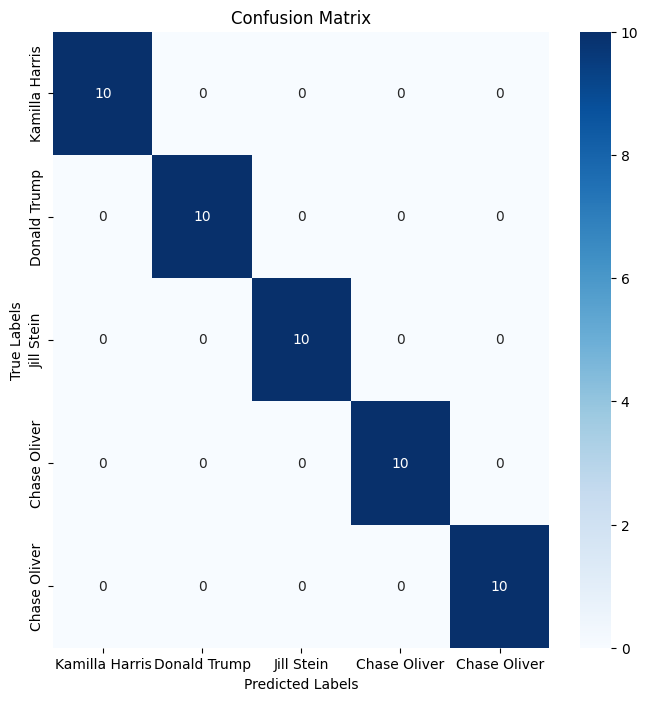

In [14]:
cm = confusion_matrix(y_true_classes, predicted_classes)

labels = ["Kamilla Harris" , "Donald Trump" , "Jill Stein" , "Chase Oliver" , "Chase Oliver"]

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
     

In [17]:
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\alibe\Downloads\PFE\my_model2_candidate_prediction (1).h5')

Importing sentiment Data

In [101]:
train_sent_ds = pd.read_csv(r'C:\Users\alibe\Downloads\PFE\tweet-sentiment-extraction-data\train.csv')
test_sent_ds= pd.read_csv(r'C:\Users\alibe\Downloads\PFE\tweet-sentiment-extraction-data\test.csv')


In [103]:
train_sent_ds

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


Processing pour les sentiments

In [104]:
train_sent = train_sent_ds['sentiment']
test_sent = test_sent_ds['sentiment']

In [105]:
train_sent.value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [106]:
train_text.isnull().sum()

np.int64(0)

In [111]:
train_text = train_sent_ds['text']
test_text = test_sent_ds['text']

In [114]:
# Fill NaN values and convert to string
train_sentiment_text = train_text.fillna("").astype(str)
test_sentiment_text = test_text.fillna("").astype(str)

In [117]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)

train_st_sequences = tokenizer.texts_to_sequences(train_sentiment_text)
test_st_sequences = tokenizer.texts_to_sequences(test_sentiment_text)

max_seq_length = 100
train_st_padded = pad_sequences(train_st_sequences, maxlen=max_seq_length, padding='post')
test_st_padded = pad_sequences(test_st_sequences, maxlen=max_seq_length, padding='post')

all_labels = pd.concat([train_sent,test_sent])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)


onehot_encoder = OneHotEncoder(sparse_output=False)

train_st_labels = train_st_labels.reshape(-1, 1)
test_st_labels = test_st_labels.reshape(-1, 1)

tr_onehot_labels = onehot_encoder.fit_transform(train_st_labels)
ts_onehot_labels = onehot_encoder.transform(test_st_labels)

In [118]:
vocab_size = 20000
train_st_input = np.array(train_st_padded)
test_st_input = np.array(test_st_padded)

train_st_label = np.array(tr_onehot_labels)
test_st_label = np.array(ts_onehot_labels)

print("Train input shape:", train_st_input.shape)
print("Train label shape:", train_st_label.shape)
print("Test input shape:", test_st_input.shape)
print("Test label shape:", test_st_label.shape)

Train input shape: (27481, 100)
Train label shape: (27481, 3)
Test input shape: (3534, 100)
Test label shape: (3534, 3)


Using The Second Model 

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional

sequence_length = 100
num_sentiment_classes = train_st_label.shape[1]  # This should be 3

secmodel = Sequential()
secmodel.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=sequence_length))
secmodel.add(Bidirectional(LSTM(128, return_sequences=True)))
secmodel.add(Dropout(0.3))
secmodel.add(Bidirectional(LSTM(64)))
secmodel.add(Dropout(0.3))
secmodel.add(Dense(num_sentiment_classes, activation='softmax'))

secmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
secmodel.build(input_shape=(None, sequence_length))
secmodel.summary()

C:\Users\alibe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,987,907 (11.40 MB)

 Trainable params: 2,987,907 (11.40 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
secmodel.fit(train_st_input,
            train_st_label,
            epochs=10,
            batch_size=32,
             validation_split=0.2,
            verbose=1)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 102s 143ms/step - accuracy: 0.5524 - loss: 0.9084 - val_accuracy: 0.7308 - val_loss: 0.6597
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 78s 114ms/step - accuracy: 0.7804 - loss: 0.5602 - val_accuracy: 0.7249 - val_loss: 0.6692
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 188s 275ms/step - accuracy: 0.8383 - loss: 0.4336 - val_accuracy: 0.7193 - val_loss: 0.6987
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 208s 303ms/step - accuracy: 0.8735 - loss: 0.3529 - val_accuracy: 0.7157 - val_loss: 0.7761
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 194s 283ms/step - accuracy: 0.9043 - loss: 0.2738 - val_accuracy: 0.7035 - val_loss: 0.8782
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 181s 263ms/step - accuracy: 0.9198 - loss: 0.2239 - val_accuracy: 0.6876 - val_loss: 1.0094
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 196s 285ms/step - accuracy: 0.9352 - loss: 0.1839 - val_accuracy: 0.6960 - val_loss: 1.0791
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 183s 266ms/step - accuracy: 0.9458 - 

Saving The Model 

In [121]:
from tensorflow.keras.models import save_model
save_model(secmodel, r'C:\Users\alibe\Downloads\PFE\my_model2_sentiment_prediction.h5')

In [122]:
from tensorflow.keras.models import load_model
secmodel = load_model(r'C:\Users\alibe\Downloads\PFE\models\my_model2_sentiment_prediction.h5')

In [124]:
sentiment_prediction = secmodel.predict(test_st_input)
predicted_sentiment_classes = np.argmax(prediction, axis=1)

111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step


In [125]:
y_true_sentiment =test_onehot_labels
y_true_sentiment_classes = np.argmax(y_true, axis=1)

In [128]:
y_true_sentiment_classes = np.argmax(test_st_label, axis=1)
predicted_sentiment_classes = np.argmax(sentiment_prediction, axis=1)

cm = confusion_matrix(y_true_sentiment_classes, predicted_sentiment_classes)
cm


array([[672, 283,  46],
       [272, 952, 206],
       [ 59, 221, 823]])

In [130]:
AS = accuracy_score(predicted_sentiment_classes , y_true_sentiment_classes)
AS
CR = classification_report(y_true_sentiment_classes, predicted_sentiment_classes)
print(CR)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      1001
           1       0.65      0.67      0.66      1430
           2       0.77      0.75      0.76      1103

    accuracy                           0.69      3534
   macro avg       0.70      0.69      0.70      3534
weighted avg       0.69      0.69      0.69      3534



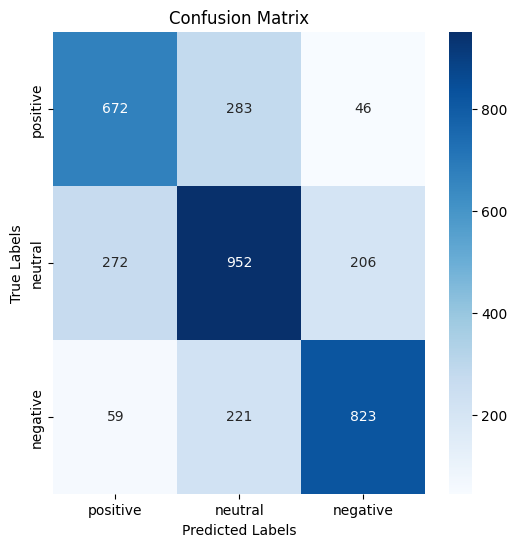

In [132]:
cm = confusion_matrix(y_true_sentiment_classes, predicted_sentiment_classes)

labels = ["positive", "neutral", "negative"]

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Testing the Code 

In [134]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Use the correct max_len for both models (assuming both use the same)
max_len = train_input.shape[1]

new_tweet = input('Give a new tweet: ')

new_seq = tokenizer.texts_to_sequences([new_tweet])
print("Tokenized sequence:", new_seq)  

new_padded = pad_sequences(new_seq, maxlen=max_len, padding='post')

# Predict party
party_pred = model.predict(new_padded)
party_class = np.argmax(party_pred, axis=1)[0]
party_label = label_encoder.classes_[party_class]

party_names = {
    0: "Kamala Harris : Democratic Party",
    1: "Jill Stein : Green Party",
    2: "Robert Kennedy Jr. : Independent",
    3: "Chase Oliver : Libertarian Party",
    4: "Donald Trump : Republican Party"
}


print(f"Predicted political orientation: {party_names.get(party_class, 'Unknown')}")
print(f"Party prediction probabilities: {party_pred}")

# Predict sentiment
sentiment_pred = secmodel.predict(new_padded)
sentiment_class = np.argmax(sentiment_pred, axis=1)[0]
sentiment_label = label_encoder.classes_[sentiment_class]

sentiment_names = {
    0: "negative",
    1: "neutral",
    2: "positive"
}

print(f"Predicted sentiment: {sentiment_label}")
print(f"Predicted sentiment (mapped): {sentiment_names.get(sentiment_class, 'Unknown')}")
print(f"Sentiment prediction probabilities: {sentiment_pred}")

Tokenized sequence: [[9520, 9, 4, 1790, 8, 5170, 4116]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted political orientation: Kamala Harris : Democratic Party
Party prediction probabilities: [[9.9859124e-01 2.9322624e-05 4.7870359e-05 9.6027571e-04 3.7133211e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted sentiment: positive
Predicted sentiment (mapped): positive
Sentiment prediction probabilities: [[6.2155159e-05 2.2382417e-04 9.9971396e-01]]


You can use these inputs if you want as suggestion : Tweets likely for Donald Trump : Republican Party (index 4)

"Trump is the best president we ever had."

"I support Trump for a stronger America."

"Donald Trump knows how to keep America great."

Tweets likely for Kamala Harris : Democratic Party (index 0)

"Kamala Harris is a strong and inspiring leader."

"I trust the Democratic Party to bring change."

"Go Democrats! Kamala is the future."

Tweets likely for Jill Stein : Green Party (index 1)

"We need more environmental policies like Jill Stein's."

"Green Party offers the best solutions for climate change."

Tweets likely for Robert Kennedy Jr. : Independent (index 2)

"Robert Kennedy Jr. is bringing a fresh perspective."

"Independent voices like Robert Kennedy Jr. are needed."

Tweets likely for Chase Oliver : Libertarian Party (index 3)

"Libertarian ideals are what Chase Oliver stands for."

"Freedom and liberty with Chase Oliver leading."